In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt

import seaborn as sns
import pickle

import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv('data/processed/all.csv')
df.head()

,X_S_Mean,Y_S_Mean,Z_S_Mean,Pressure_S_Mean,GripAngle_S_Mean,Timestamp_S_Mean,TestID_S_Mean,X_D_Mean,Y_D_Mean,Z_D_Mean,...,totalPath_D,RadMax_S,RadMax_D,Xmax_S,Ymax_S,AR_S,Xmax_D,Ymax_D,AR_D,label
0,-0.503417,-0.389901,1.047314,1.465872,-0.912537,1.295375,0.0,-0.861897,-1.961317,0.324845,...,-0.610323,-0.022508,-0.750746,0.202143,0.644019,0.094036,-0.725578,-0.878084,0.251182,0
1,-0.656574,0.129405,1.064880,0.852635,-0.940621,1.295168,0.0,-0.537784,0.026864,0.497585,...,-0.016094,-0.081202,-0.246308,-0.086879,0.644019,0.577453,-0.031600,0.636462,0.276411,0
2,0.090926,2.607866,1.035457,1.206960,-0.645076,-0.700921,0.0,-0.315147,2.587084,0.961761,...,0.327534,0.506138,0.076783,0.645998,1.432166,0.140343,0.328566,1.516535,0.349598,0
3,-0.558532,0.635222,0.960458,1.530995,-0.302122,-0.702074,0.0,-0.658161,0.182301,1.029741,...,0.045869,-0.022862,-0.197538,0.191821,0.719080,0.180520,0.065030,0.656928,0.139239,0
4,-0.623840,-0.359751,0.787165,1.676994,-0.838518,1.295623,0.0,-0.847491,-1.270676,0.353442,...,-0.476041,-0.043471,-0.400644,0.191821,0.737846,0.198139,-0.620164,0.738796,1.540949,0


In [7]:
df.shape

(72, 101)

In [8]:
def get_dist(var,name):
    df1=df.groupby(['label']).mean()
    sns.catplot(x="label", y=var, kind="bar",  data=df, alpha=0.7)
    plot_title=name+" of each category"
    plt.title(plot_title)
    plt.xlabel("Label") 
    plt.ylabel(name)
    plt.show()

In [9]:
# df=df.dropna()
output_columns = ["label"] 
x=df.drop(output_columns,axis=1)
y=df[output_columns]

trainX,testX,trainY,testY=train_test_split(x,y,test_size=0.3,random_state=42)
trainY.head()
print(trainX.shape)


(50, 100)


In [10]:
df.isnull().sum()

X_S_Mean              0
Y_S_Mean              0
Z_S_Mean              0
Pressure_S_Mean       0
GripAngle_S_Mean      0
Timestamp_S_Mean      0
TestID_S_Mean         0
X_D_Mean              0
Y_D_Mean              0
Z_D_Mean              0
Pressure_D_Mean       0
GripAngle_D_Mean      0
Timestamp_D_Mean      0
TestID_D_Mean         0
dX_S_Mean             0
dY_S_Mean             0
angle_S_Mean          0
angleChange_S_Mean    0
angleAccel_S_Mean     0
PathLength_S_Mean     0
accel_S_Mean          0
accel3_S_Mean         0
jerk_S_Mean           0
radX_S_Mean           0
radY_S_Mean           0
ang_S_Mean            0
da_S_Mean             0
rad_S_Mean            0
dr/dt_S_Mean          0
dX_D_Mean             0
                     ..
rad_S_Var             0
dr/dt_S_Var           0
dX_D_Var              0
dY_D_Var              0
angle_D_Var           0
angleChange_D_Var     0
angleAccel_D_Var      0
PathLength_D_Var      0
accel_D_Var           0
accel3_D_Var          0
jerk_D_Var      

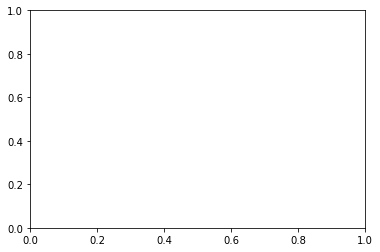

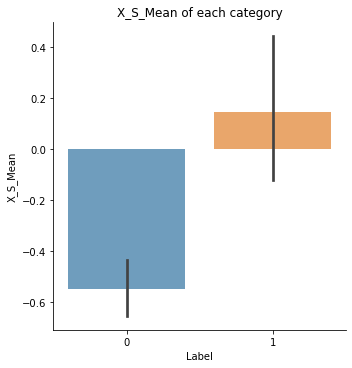

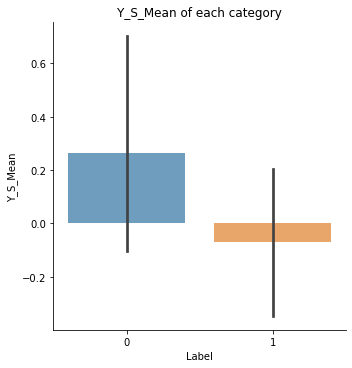

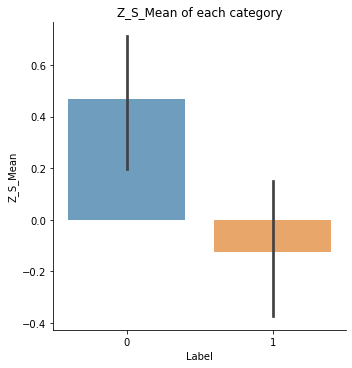

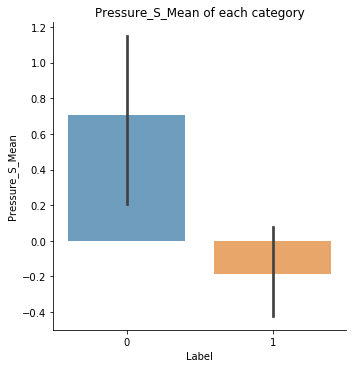

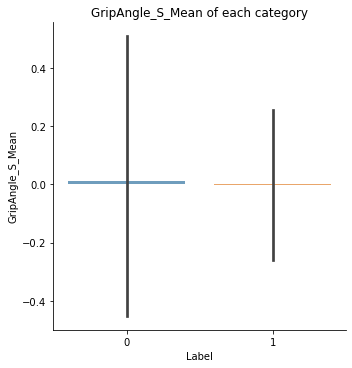

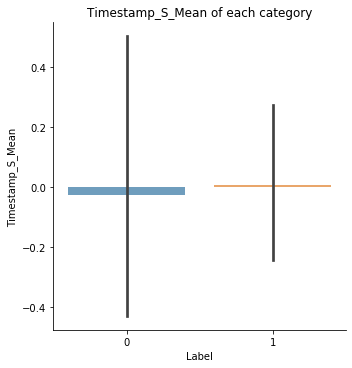

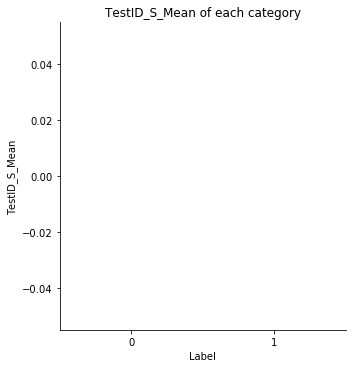

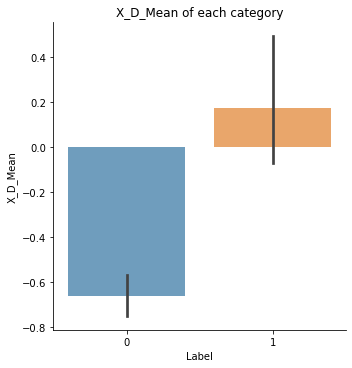

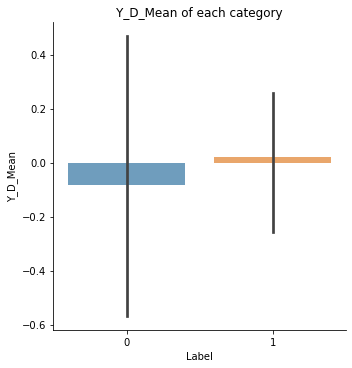

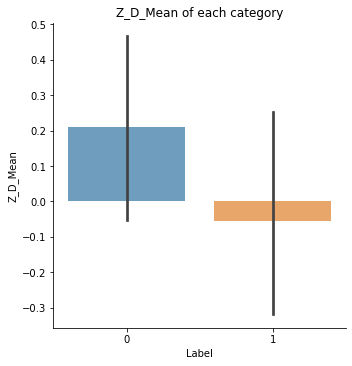

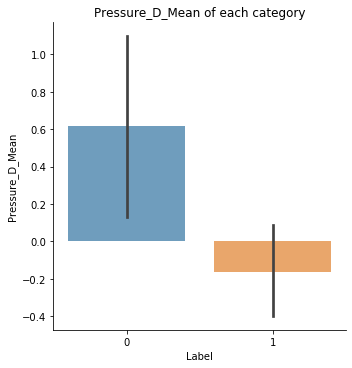

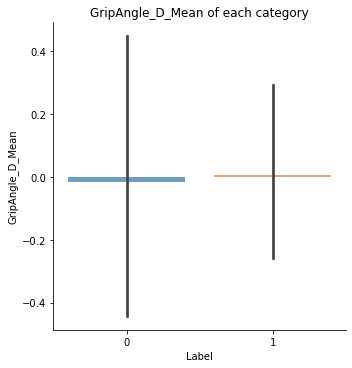

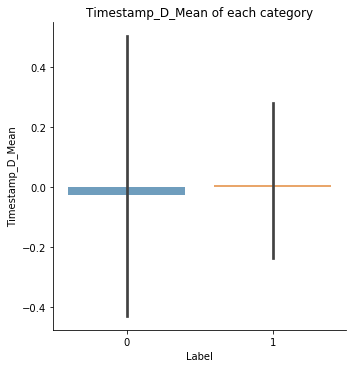

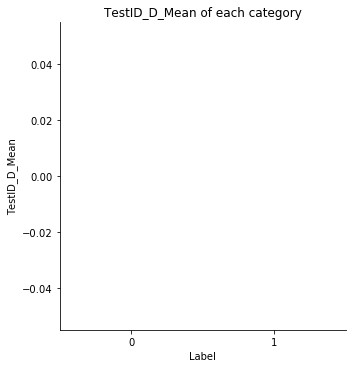

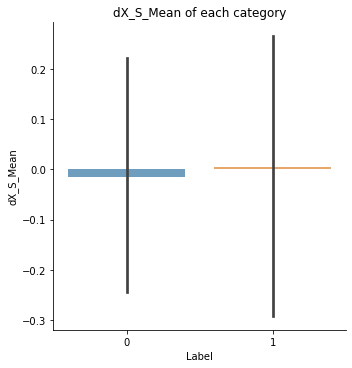

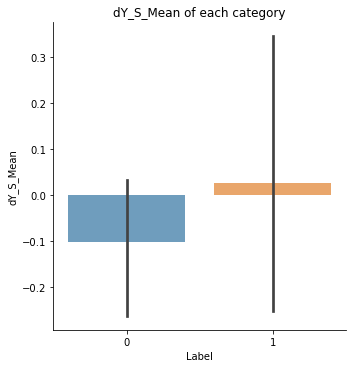

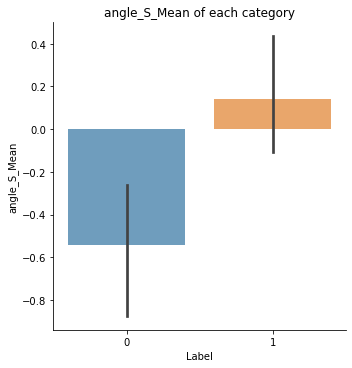

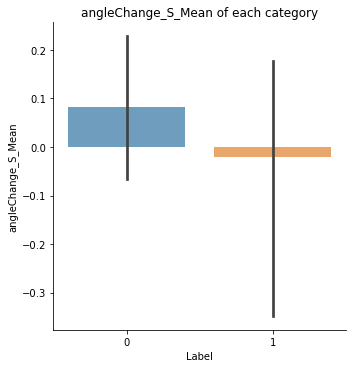

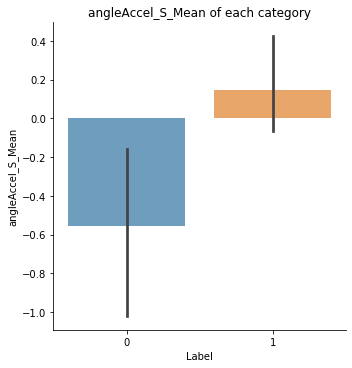

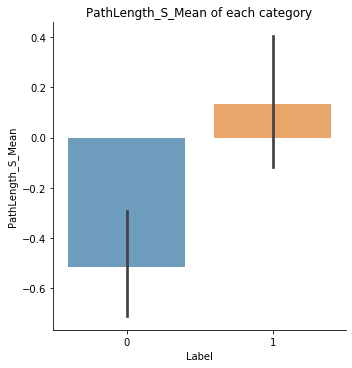

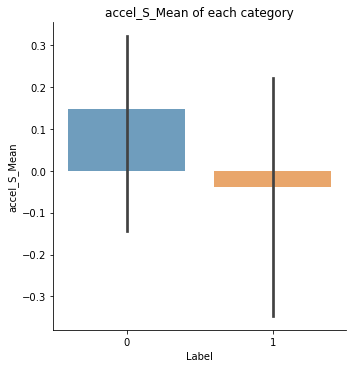

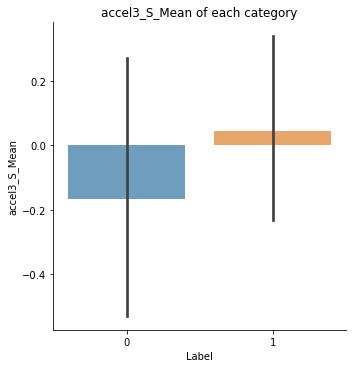

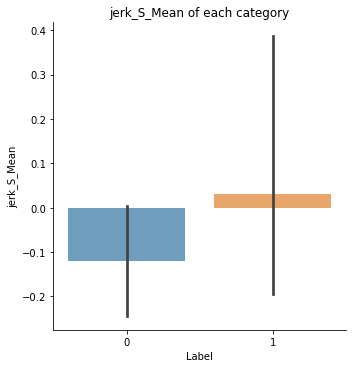

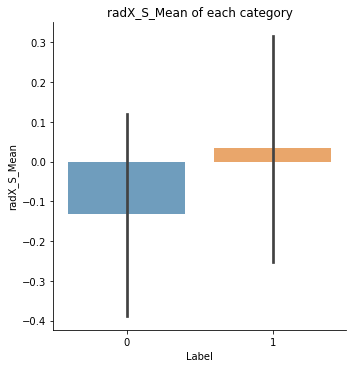

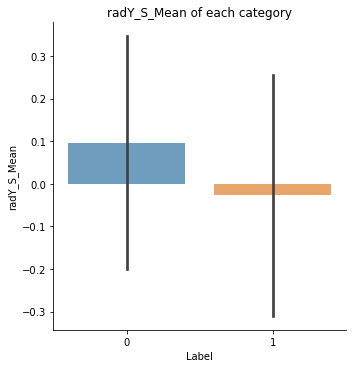

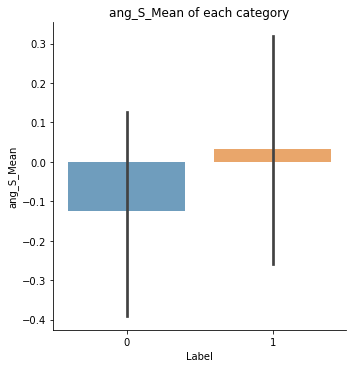

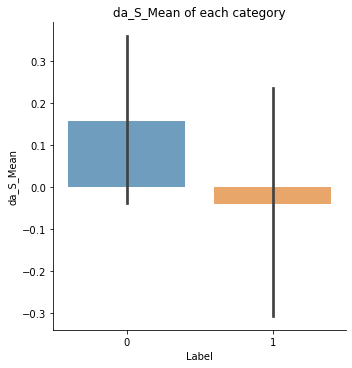

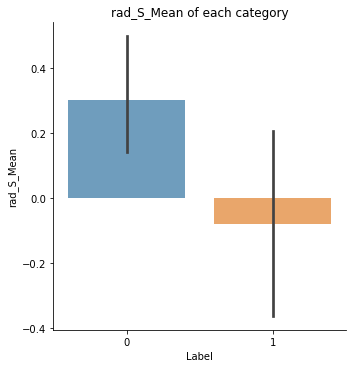

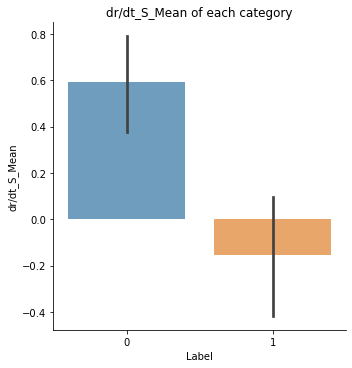

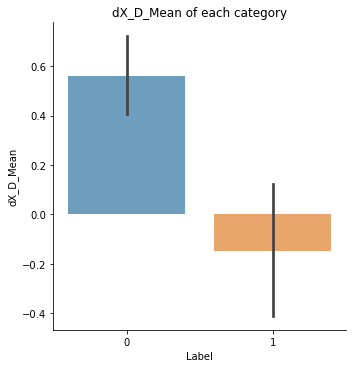

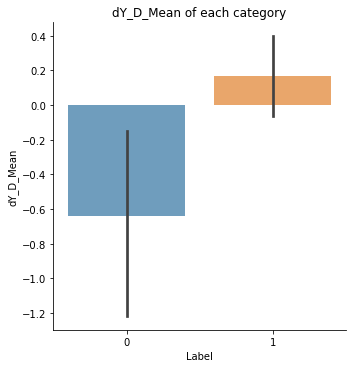

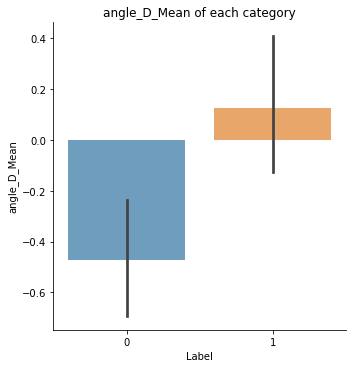

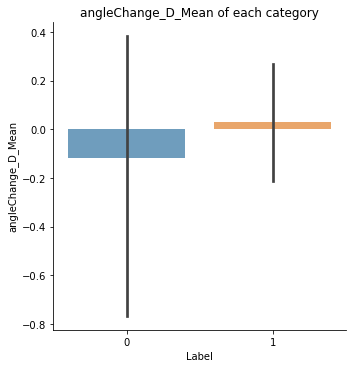

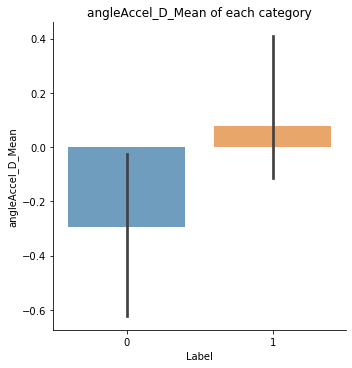

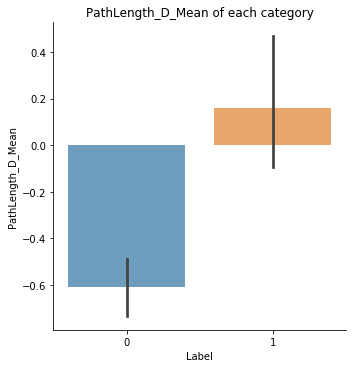

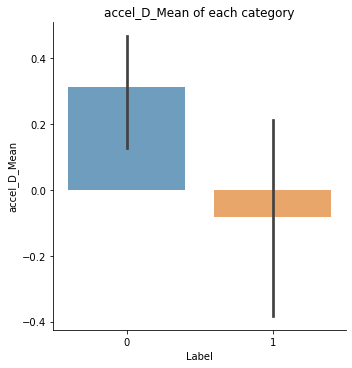

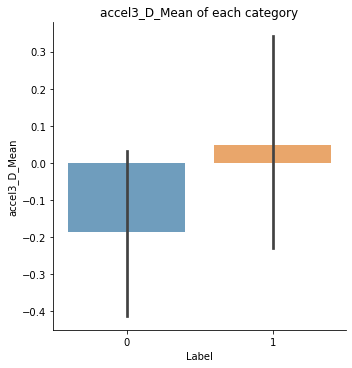

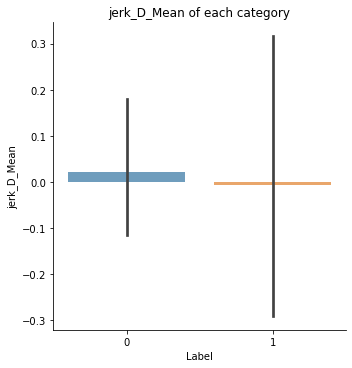

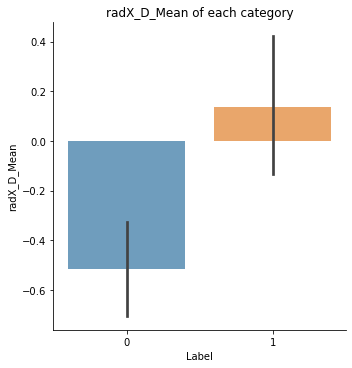

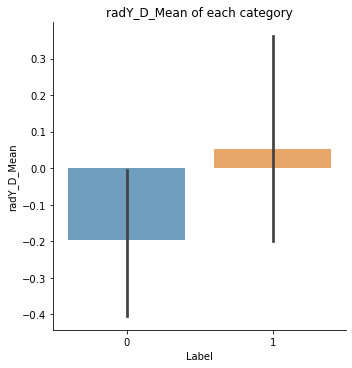

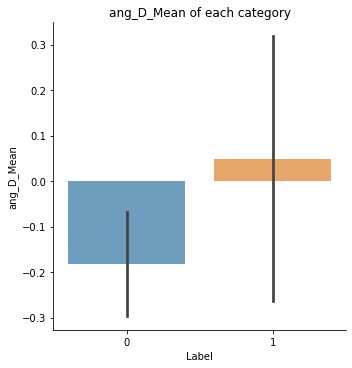

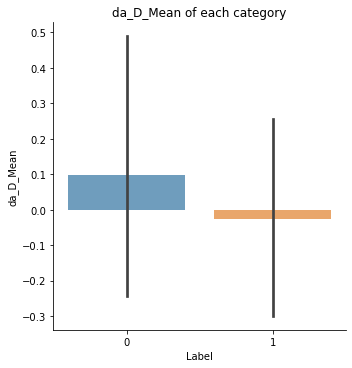

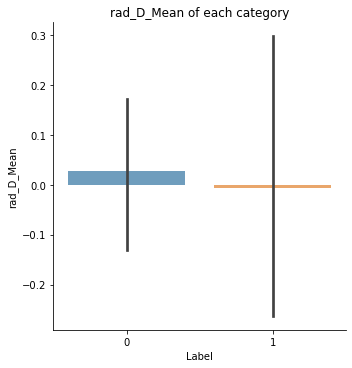

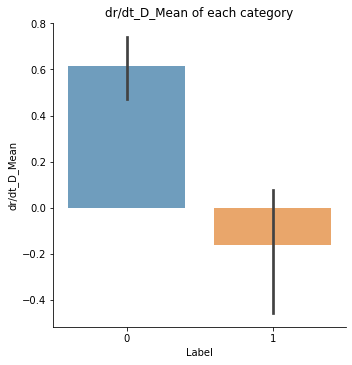

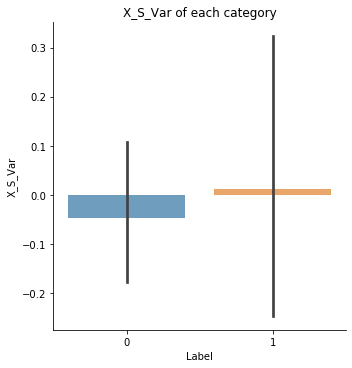

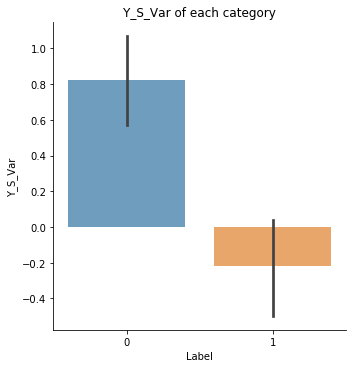

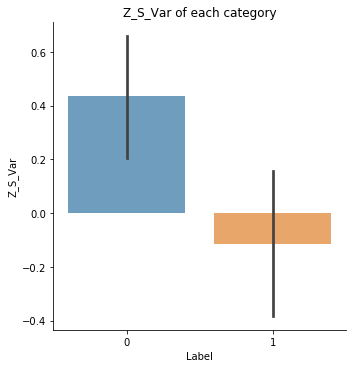

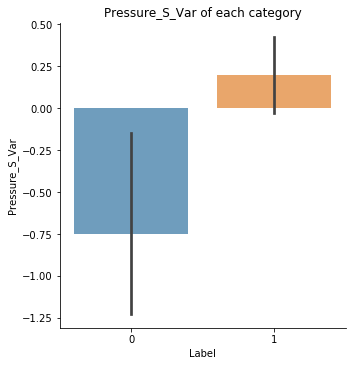

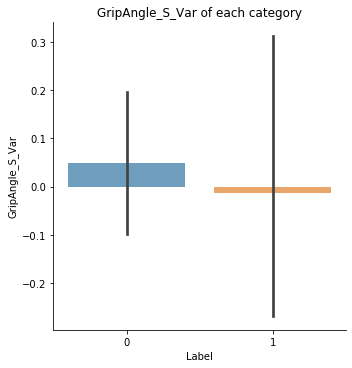

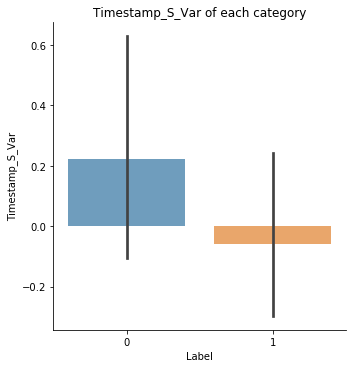

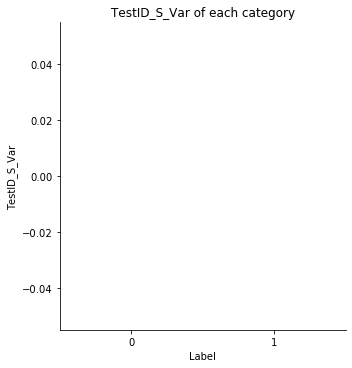

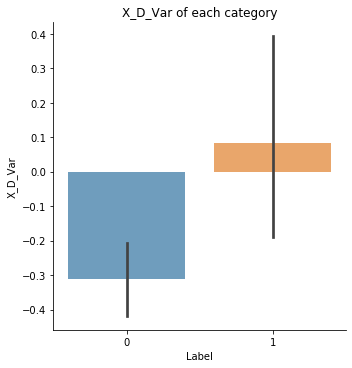

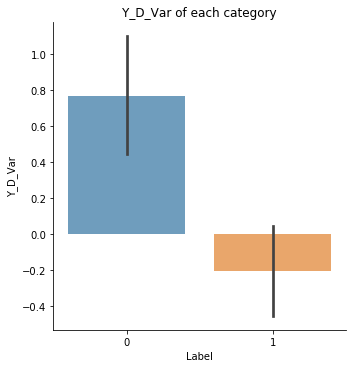

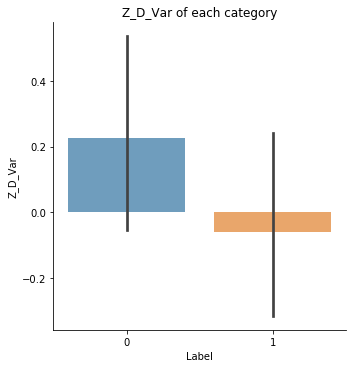

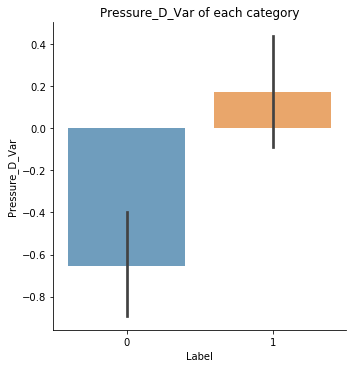

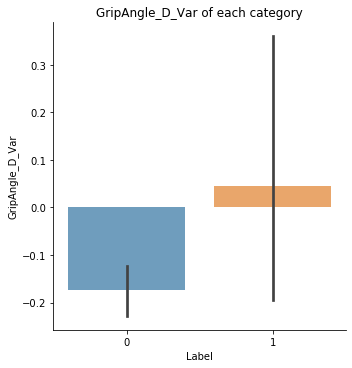

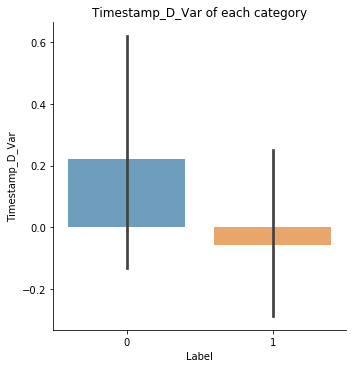

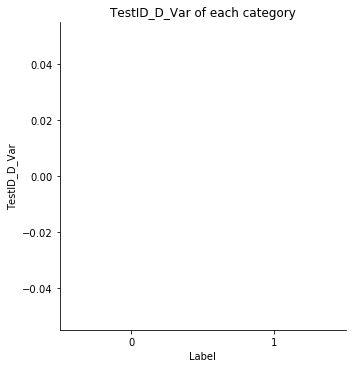

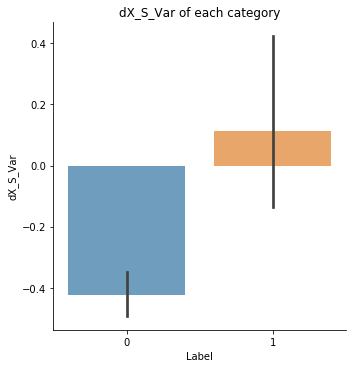

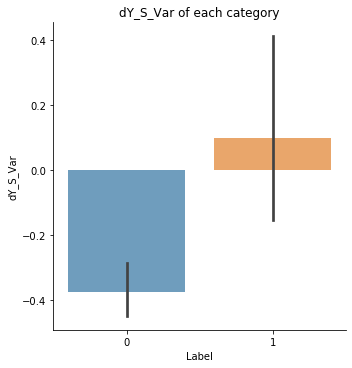

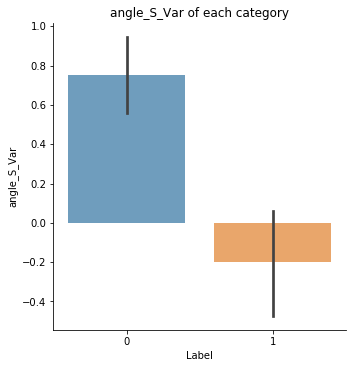

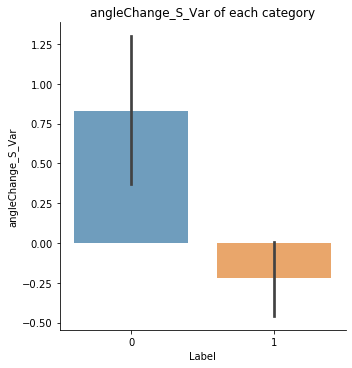

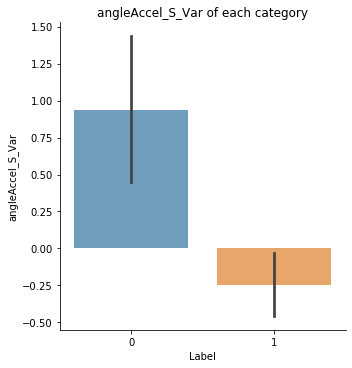

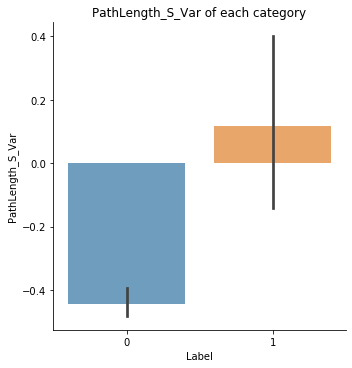

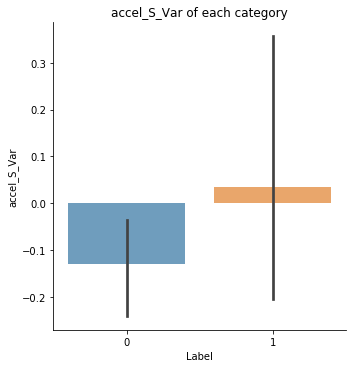

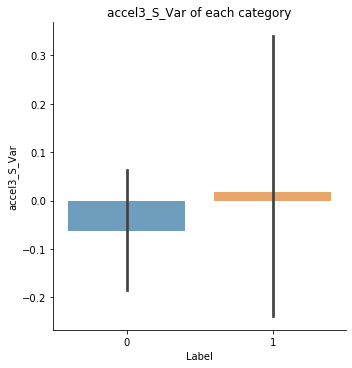

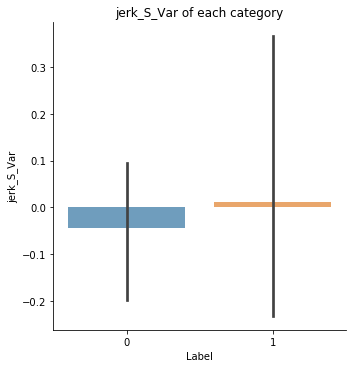

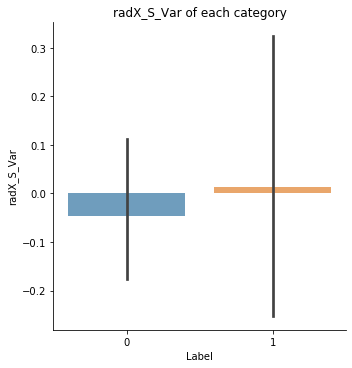

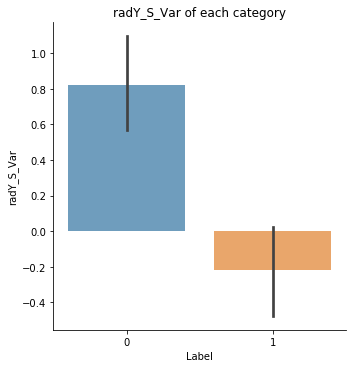

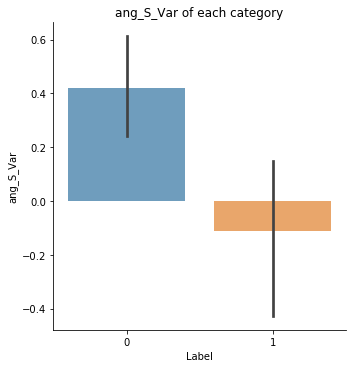

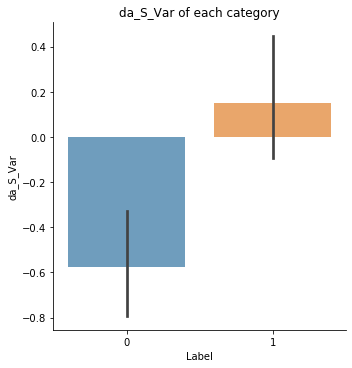

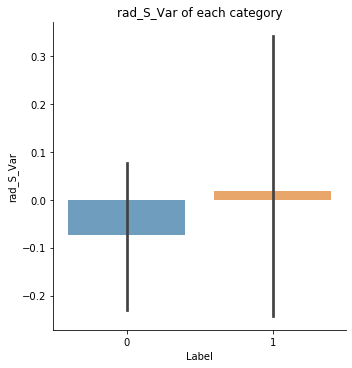

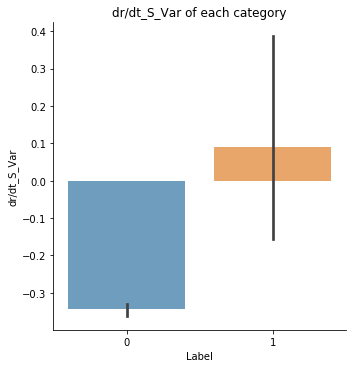

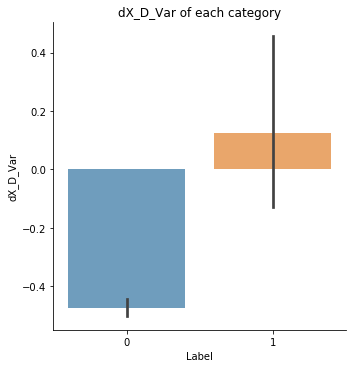

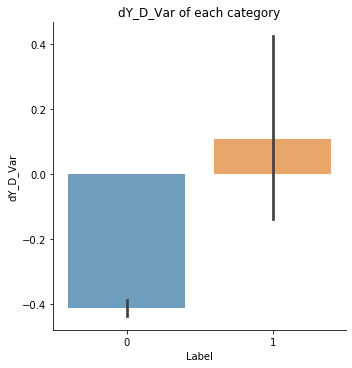

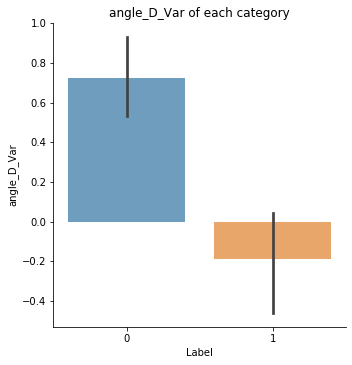

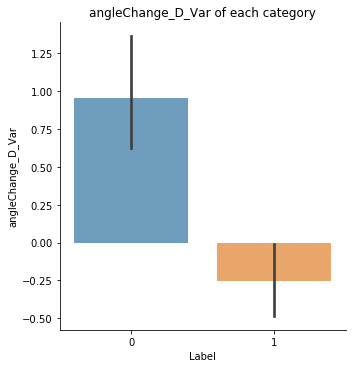

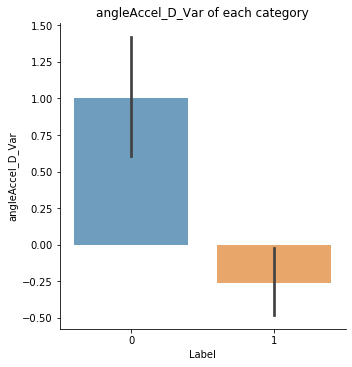

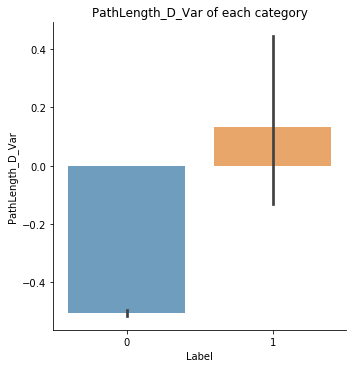

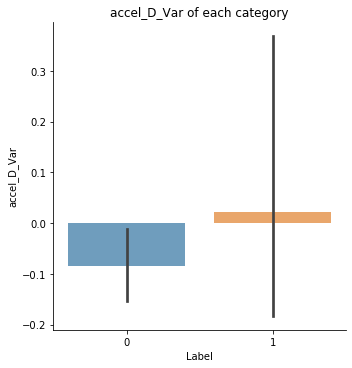

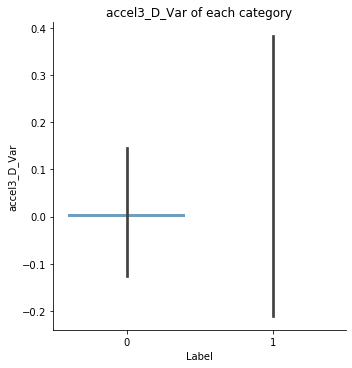

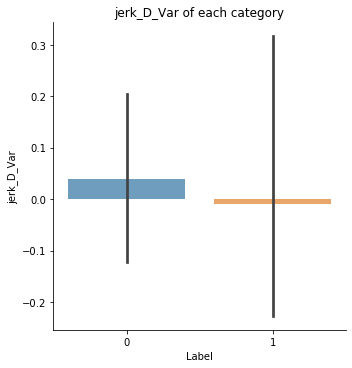

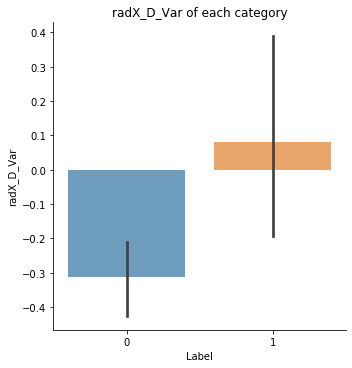

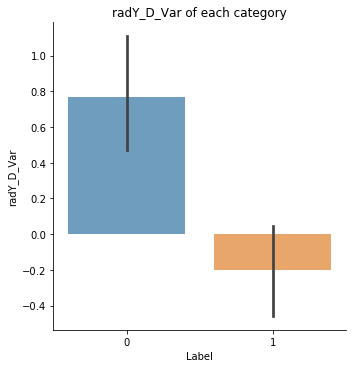

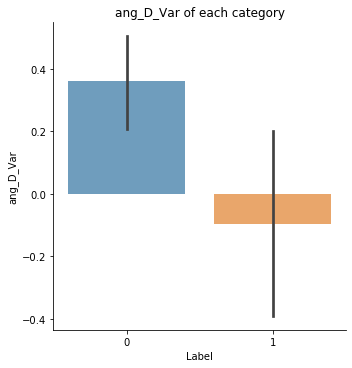

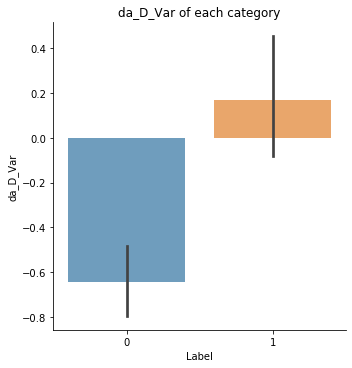

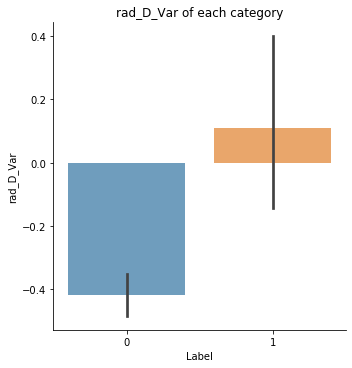

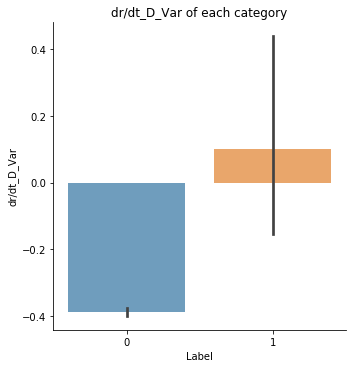

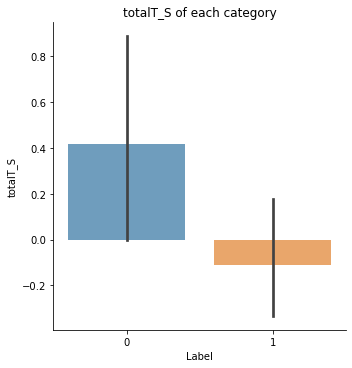

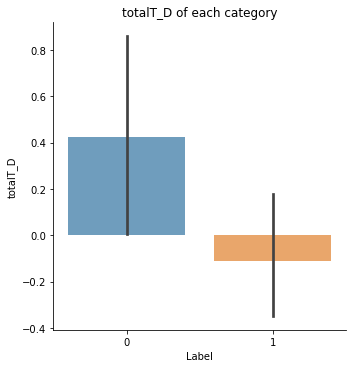

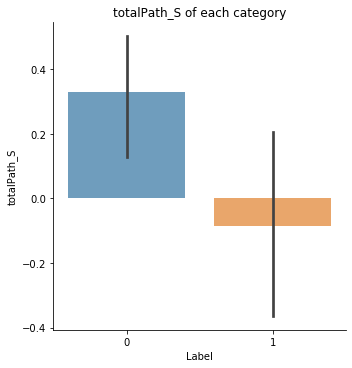

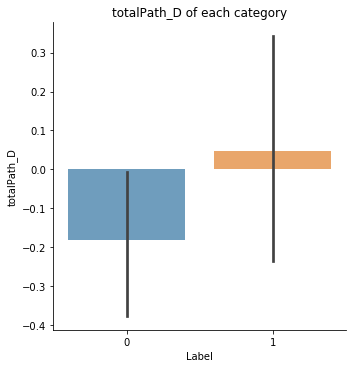

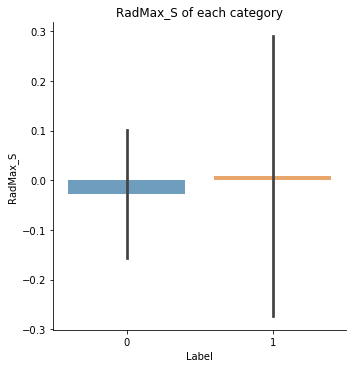

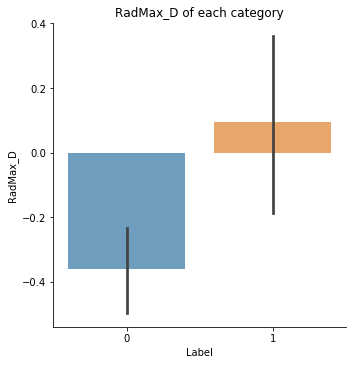

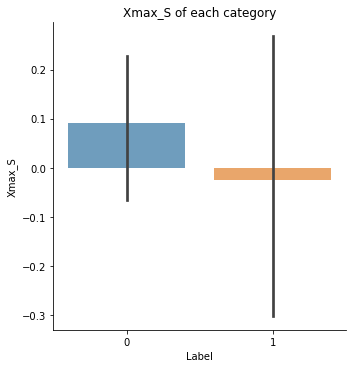

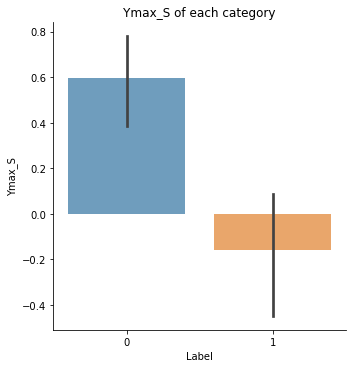

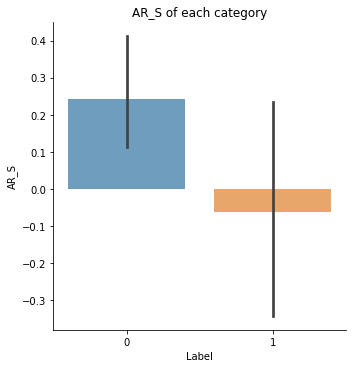

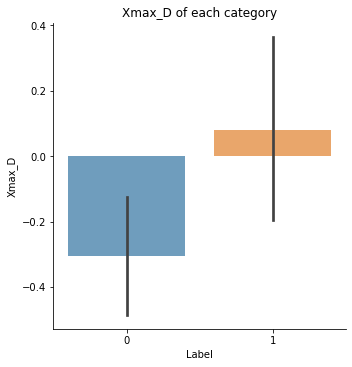

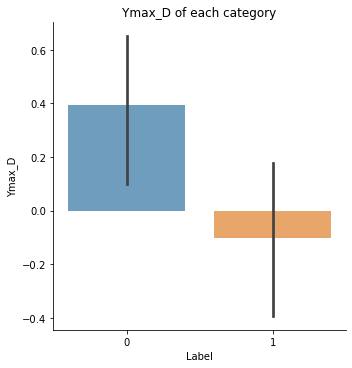

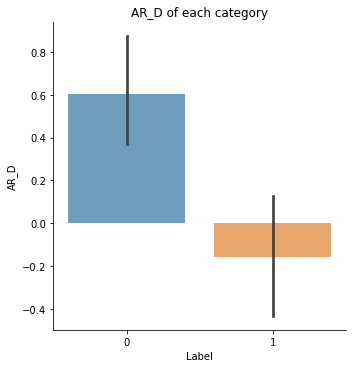

In [11]:
col_list=trainX.columns.tolist()
for col in col_list:
    get_dist(col,col)



In [12]:
def check_balance(y):
    sns.countplot('label', data=y, palette="hls") # It's a module to count the category's
    plt.title("The count values of each category", fontsize=22) 
    plt.rcParams["axes.labelsize"] = 32
    plt.xlabel("Converted", fontsize=16) 
    plt.ylabel("Count", fontsize=16) 
    sns.set(font_scale=1.2)
    plt.show()

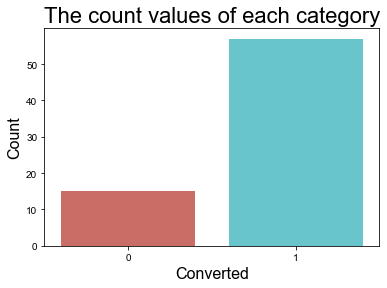

In [13]:
check_balance(y)

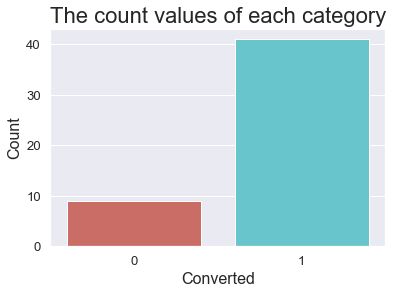

In [14]:
check_balance(trainY)

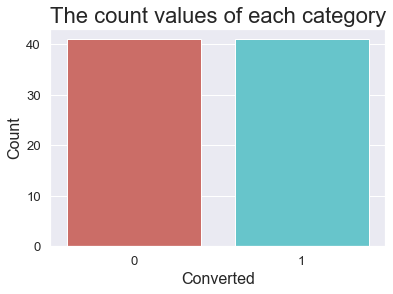

In [15]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
trainX_smote, trainY_smote = smt.fit_sample(trainX, trainY)
trainX_smote=pd.DataFrame(trainX_smote)
trainY_smote=pd.DataFrame(trainY_smote)
trainX_smote.columns=trainX.columns
trainY_smote.columns=trainY.columns
# Confirm that the data is balanced
check_balance(trainY_smote)

In [16]:
def get_cnf_matrix(cnf_matrix):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis] 
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()


In [17]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix'):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
#     print(thresh)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [18]:
def get_report(x_train,y_train,x_test,y_test, model, model_name):
    # Normalize the features
    from sklearn.preprocessing import StandardScaler
    print(model_name)
    model.fit(x_train, y_train)
    # save the model to disk
#     filename = 'models/LR_with_top_features.pkl'
#     pickle.dump(model, open(filename, 'wb'))
    y_pred = model.predict(x_test)
    predictions = model.predict_proba(x_test)

    print('*'*60)

    # Get accuracy report
    print('Accuracy on training set: {:.2f}'.format(model.score(x_train, y_train)))
    print('Accuracy on test set: {:.2f}'.format(model.score(x_test, y_test)))
    print('*'*60)
    
    # Get confusion matrix
    print("Confusion matrix:")
    matrix = confusion_matrix(y_test, y_pred)
    print('*'*60)
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred) 
    print('--------------------')
    print('| Confusion Matrix |')
    print('--------------------')
    print('\n {}'.format(cm))
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]   
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    class_labels=[0,1]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix')
    
    # Get classification report
    print("Classification report: ")
    print(classification_report(y_test, y_pred))
    print('*'*60)
    
    # Get roc curve
    print("ROC curve")
    logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='%s (area = %0.2f)' % (model_name,logit_roc_auc))
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

### Logistic regression

Logistic regression
************************************************************
Accuracy on training set: 1.00
Accuracy on test set: 0.95
************************************************************
Confusion matrix:
************************************************************
--------------------
| Confusion Matrix |
--------------------

 [[ 6  0]
 [ 1 15]]


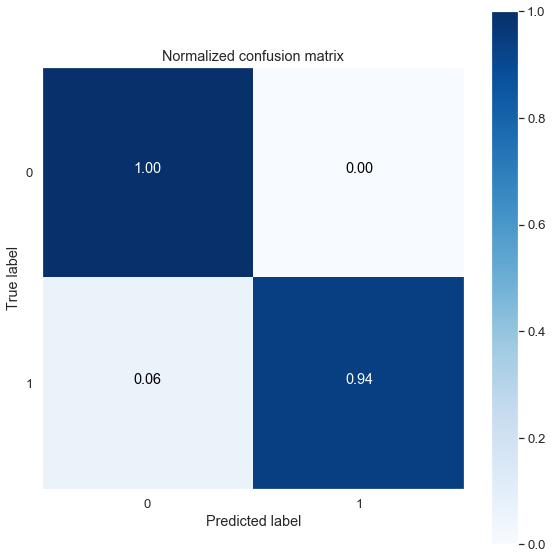

Classification report: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.94      0.97        16

   micro avg       0.95      0.95      0.95        22
   macro avg       0.93      0.97      0.95        22
weighted avg       0.96      0.95      0.96        22

************************************************************
ROC curve


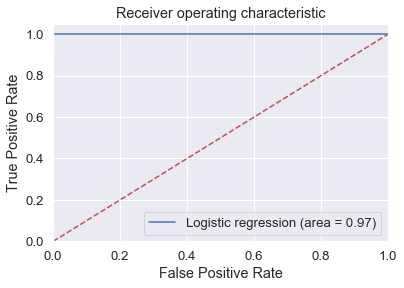

In [19]:
model_LR = LogisticRegression()
get_report(trainX,trainY,testX,testY,model_LR,"Logistic regression")

Logistic regression
************************************************************
Accuracy on training set: 1.00
Accuracy on test set: 0.91
************************************************************
Confusion matrix:
************************************************************
--------------------
| Confusion Matrix |
--------------------

 [[ 6  0]
 [ 2 14]]


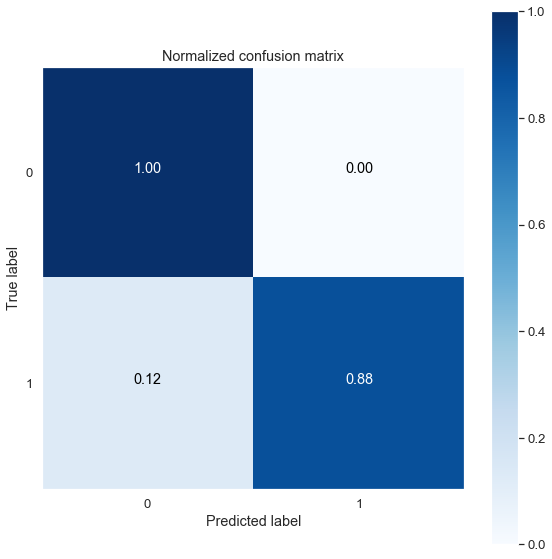

Classification report: 
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.88      0.93        16

   micro avg       0.91      0.91      0.91        22
   macro avg       0.88      0.94      0.90        22
weighted avg       0.93      0.91      0.91        22

************************************************************
ROC curve


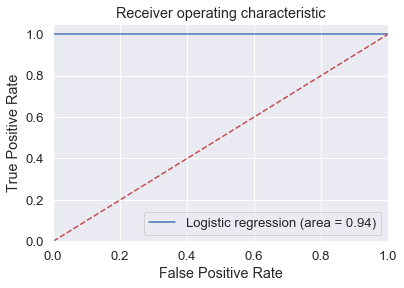

In [20]:
model_LR = LogisticRegression()
get_report(trainX_smote,trainY_smote,testX,testY,model_LR,"Logistic regression")


### Random forests

Randome forests
************************************************************
Accuracy on training set: 1.00
Accuracy on test set: 0.86
************************************************************
Confusion matrix:
************************************************************
--------------------
| Confusion Matrix |
--------------------

 [[ 3  3]
 [ 0 16]]


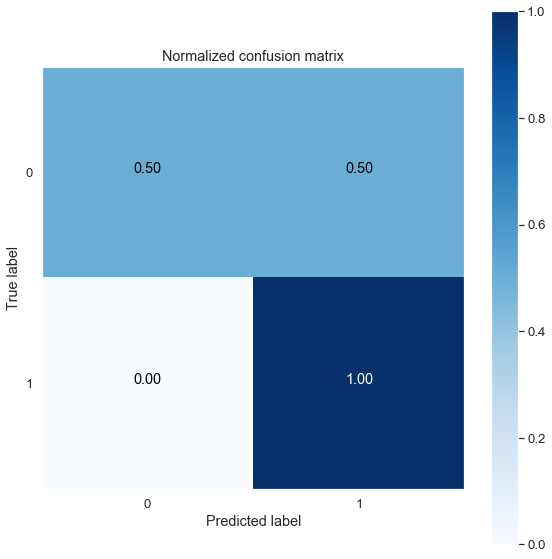

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.84      1.00      0.91        16

   micro avg       0.86      0.86      0.86        22
   macro avg       0.92      0.75      0.79        22
weighted avg       0.89      0.86      0.85        22

************************************************************
ROC curve


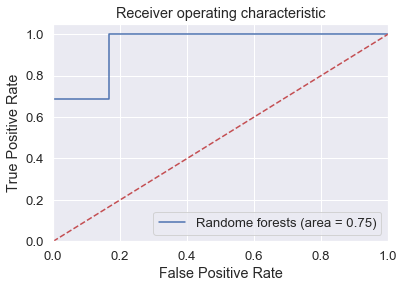

In [21]:
model_RF = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
get_report(trainX,trainY,testX,testY,model_RF,"Randome forests")

Random forests
************************************************************
Accuracy on training set: 1.00
Accuracy on test set: 0.91
************************************************************
Confusion matrix:
************************************************************
--------------------
| Confusion Matrix |
--------------------

 [[ 5  1]
 [ 1 15]]


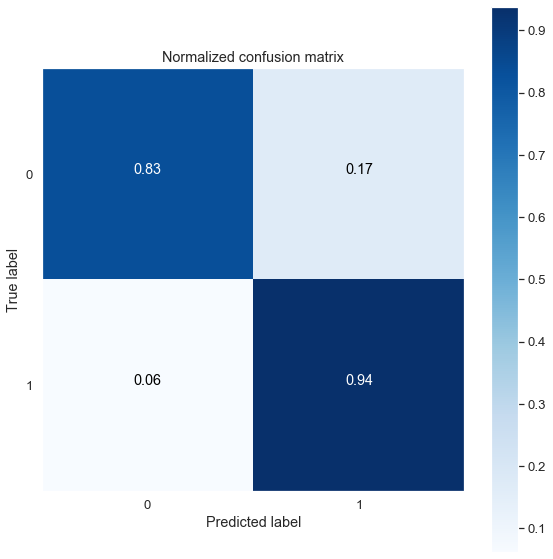

Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.94      0.94      0.94        16

   micro avg       0.91      0.91      0.91        22
   macro avg       0.89      0.89      0.89        22
weighted avg       0.91      0.91      0.91        22

************************************************************
ROC curve


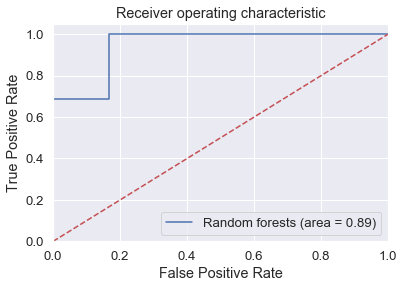

In [22]:
get_report(trainX_smote,trainY_smote,testX,testY,model_RF,"Random forests")

XGBoost
************************************************************
Accuracy on training set: 1.00
Accuracy on test set: 0.82
************************************************************
Confusion matrix:
************************************************************
--------------------
| Confusion Matrix |
--------------------

 [[ 2  4]
 [ 0 16]]


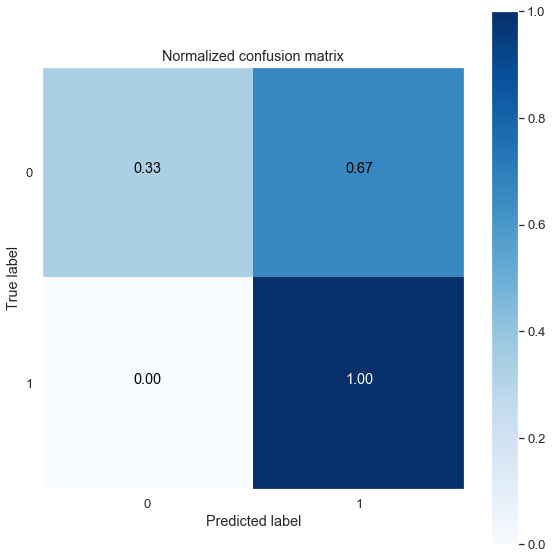

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.80      1.00      0.89        16

   micro avg       0.82      0.82      0.82        22
   macro avg       0.90      0.67      0.69        22
weighted avg       0.85      0.82      0.78        22

************************************************************
ROC curve


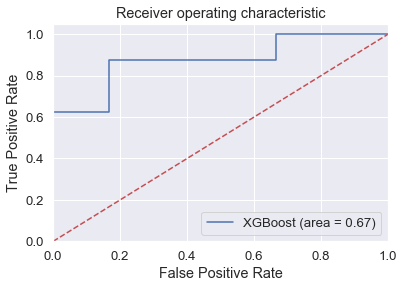

In [23]:
from xgboost import XGBClassifier
# fit model no training data
model_xgboost = XGBClassifier()
# model_xgboost.fit(trainX, trainY)
# make predictions for test data
# y_pred = model_xgboost.predict(X_test)
# predictions = [round(value) for value in y_pred]
get_report(trainX,trainY,testX,testY,model_xgboost,"XGBoost")

XGBoost
************************************************************
Accuracy on training set: 1.00
Accuracy on test set: 0.77
************************************************************
Confusion matrix:
************************************************************
--------------------
| Confusion Matrix |
--------------------

 [[ 3  3]
 [ 2 14]]


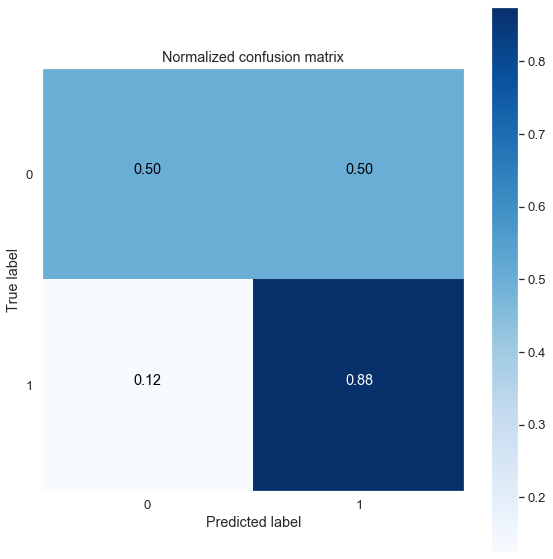

Classification report: 
              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.82      0.88      0.85        16

   micro avg       0.77      0.77      0.77        22
   macro avg       0.71      0.69      0.70        22
weighted avg       0.76      0.77      0.77        22

************************************************************
ROC curve


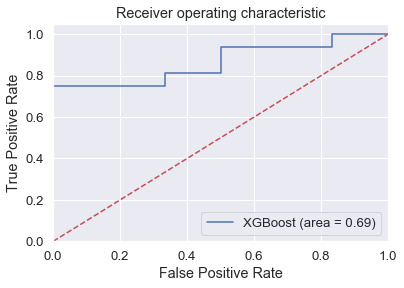

In [24]:
get_report(trainX_smote,trainY_smote,testX,testY,model_xgboost,"XGBoost")

Features sorted by their score:
[(0.0723, 'PathLength_D_Var'), (0.0719, 'Pressure_S_Var'), (0.0558, 'angleAccel_D_Var'), (0.045, 'angleChange_D_Var'), (0.0408, 'Y_D_Var'), (0.04, 'radY_D_Var'), (0.0304, 'dX_D_Var'), (0.0291, 'angleAccel_S_Var'), (0.0243, 'dr/dt_D_Var'), (0.0232, 'X_D_Mean'), (0.0201, 'Y_S_Var'), (0.0195, 'angleAccel_S_Mean'), (0.0189, 'angle_D_Var'), (0.0183, 'radY_S_Var'), (0.0183, 'GripAngle_S_Var'), (0.0179, 'PathLength_S_Var'), (0.0174, 'dr/dt_S_Var'), (0.0169, 'Pressure_S_Mean'), (0.0159, 'angleChange_S_Var'), (0.0157, 'accel3_D_Var'), (0.0147, 'rad_D_Var'), (0.0146, 'AR_S'), (0.0145, 'jerk_D_Var'), (0.0139, 'PathLength_D_Mean'), (0.0135, 'angle_S_Var'), (0.0131, 'dY_D_Var'), (0.0118, 'ang_D_Mean'), (0.0117, 'AR_D'), (0.011, 'dY_S_Mean'), (0.0107, 'jerk_D_Mean'), (0.0097, 'da_S_Var'), (0.0094, 'Pressure_D_Var'), (0.0091, 'radY_D_Mean'), (0.0089, 'accel_D_Var'), (0.008, 'angle_S_Mean'), (0.0076, 'Pressure_D_Mean'), (0.0074, 'radX_D_Mean'), (0.0071, 'angle_D_Mean'),

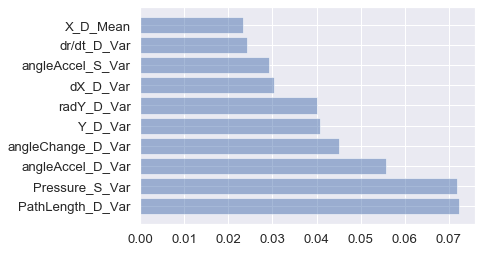

[0.00714248 0.00154546 0.00447207 0.01694139 0.00141877 0.00117505
 0.         0.02318446 0.00357797 0.00479086 0.00755063 0.0016697
 0.00103358 0.         0.00105152 0.01097838 0.00800105 0.00161938
 0.0195499  0.00374712 0.00309229 0.00403716 0.00158324 0.00432977
 0.00546062 0.00575554 0.00128613 0.00397239 0.00649281 0.00496548
 0.00204474 0.00713201 0.0071403  0.00253448 0.01385205 0.00352307
 0.00221142 0.01071419 0.00736571 0.00910478 0.01181374 0.0012995
 0.00318598 0.00636785 0.00353402 0.02013264 0.00431919 0.07185761
 0.01830743 0.00282438 0.         0.00136676 0.04079158 0.00559519
 0.0093916  0.00266153 0.00271644 0.         0.00461709 0.00262244
 0.01350158 0.01589975 0.02907587 0.01788724 0.0031615  0.00530325
 0.00280288 0.00337077 0.0182633  0.00288057 0.00966974 0.00164077
 0.01737916 0.03041569 0.0131278  0.01889514 0.04504789 0.05579061
 0.0723222  0.00890519 0.01566887 0.01452075 0.00158503 0.04000409
 0.00460483 0.00657731 0.01469135 0.02429246 0.0026681  0.003162

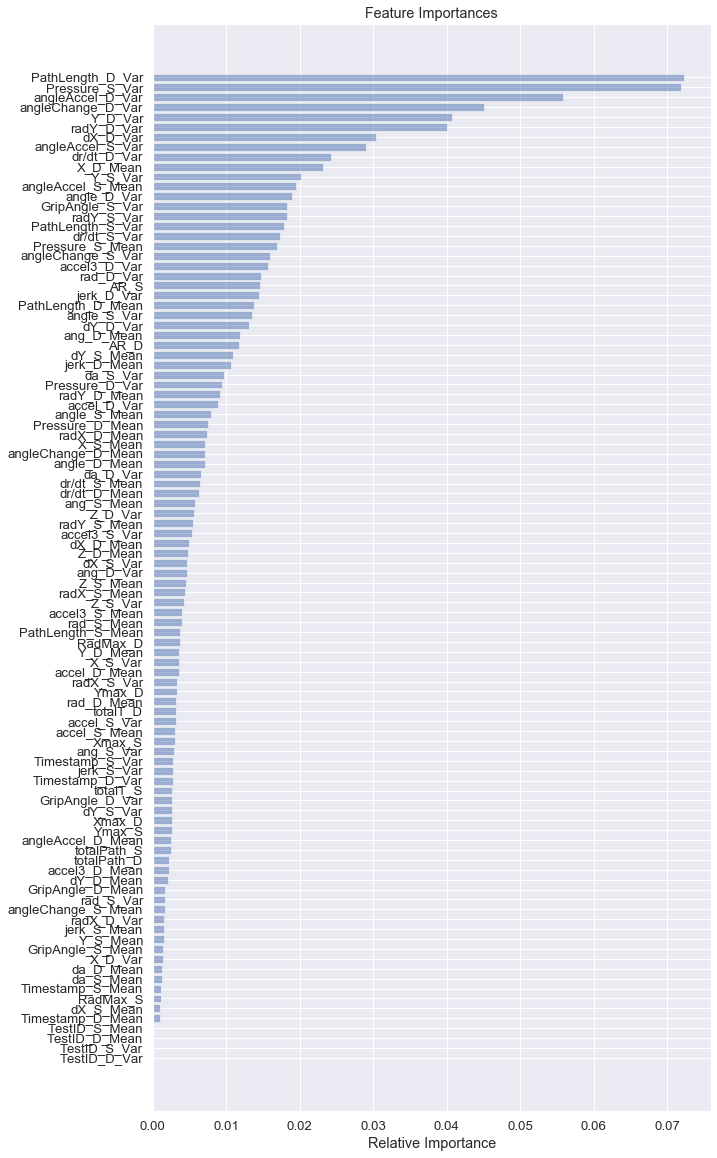

In [25]:
print("Features sorted by their score:")
# Print the name and gini importance of each feature
col_list=trainX.columns.tolist()

importance=sorted(zip(map(lambda x: round(x, 4), model_RF.feature_importances_), col_list), 
             reverse=True)

print(sorted(zip(map(lambda x: round(x, 4), model_RF.feature_importances_), col_list), 
             reverse=True))

# plt.bar(importance)
importance

x_val = [x[0] for x in importance[0:10]]
y_val = [x[1] for x in importance[0:10]]

plt.barh(y_val[0:10], x_val[0:10], align='center', alpha=0.5)

plt.show()


importances = model_RF.feature_importances_
indices = np.argsort(importances)
print(importances,indices)

plt.figure(figsize=(10,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center',alpha=0.5)
plt.yticks(range(len(indices)), [col_list[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()



### Logistic regression on most important features

In [26]:
def important_features(trainX, trainY, num ):
    from sklearn.feature_selection import SelectFromModel
    # Create a selector object that will use the random forest classifier to identify
    # features that have an importance of more than 0.15
    sfm = SelectFromModel(model_RF, threshold=-np.inf, max_features=num)

    # Train the selector
    sfm.fit(trainX, trainY)

    # Print the names of the most important features
    feature_name=[]
    for feature_list_index in sfm.get_support(indices=True):
    #     print(col_list[feature_list_index])
        feature_name.append(col_list[feature_list_index])

    feature_name = pd.DataFrame(feature_name).transpose()
    feature_name.columns = feature_name.iloc[0]
    feature_name = feature_name[1:]
#     print(feature_name)
    feature_file='data/processed/feature_name_'+str(num)+'features.csv'
#     print(type(feature_name_file))
    feature_name.to_csv(feature_file,index=False)

    # Transform the data to create a new dataset containing only the most important features
    # Note: We have to apply the transform to both the training X and test X data.
    X_important_train = sfm.transform(trainX)
    X_important_test = sfm.transform(testX)
    # Convert np array to dataframe
    X_important_train=pd.DataFrame(X_important_train)
    X_important_test=pd.DataFrame(X_important_test)
    # Smote for training X
    X_important_train_smote, trainY_smote = smt.fit_sample(X_important_train,trainY)
    X_important_train_smote=pd.DataFrame(X_important_train_smote)
    trainY_smote=pd.DataFrame(trainY_smote)
    return X_important_train, X_important_test, X_important_train_smote, trainY_smote


In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
def imbalanced_cross_validation_score(clf, x, y, cv, scoring, sampler):
    '''
        This function computes the cross-validation score of a given 
        classifier using a choice of sampling function to mitigate 
        the class imbalance, and stratified k-fold sampling.
        
        The first five arguments are the same as 
        sklearn.model_selection.cross_val_score.
        
        - clf.predict_proba(x) returns class label probabilities
        - clf.fit(x,y) trains the model
        
        - x = data
        
        - y = labels
        
        - cv = the number of folds in the cross validation
        
        - scoring(classifier, x, y) returns a float
        
        The last argument is a choice of random sampler: an object 
        similar to the sampler objects available from the python 
        package imbalanced-learn. In particular, this 
        object needs to have the method:
        
        sampler.fit_sample(x,y)
        
        See http://contrib.scikit-learn.org/imbalanced-learn/
        for more details and examples of other sampling objects 
        available.  
    
    '''
    
    training_score = 0.
    testing_score = 0.
    train_score = 0.
    test_score = 0.
    
    # stratified k-fold creates folds with the same ratio of positive 
    # and negative samples as the entire dataset.
    
    skf = StratifiedKFold(n_splits=cv, random_state=0, shuffle=False)
    for train_idx, test_idx in skf.split(x,y):
        xfold_train_sampled, yfold_train_sampled = sampler.fit_sample(x.iloc[train_idx],y.iloc[train_idx])
        clf.fit(xfold_train_sampled, yfold_train_sampled)
#         classifier.fit(X_train, y_train)

# Predict using the trained classifier and the test data
        y_pred = clf.predict(xfold_train_sampled)
        train_score = scoring(yfold_train_sampled,y_pred)
        y_test_pred=clf.predict(x.iloc[test_idx])
        test_score  = scoring(y.iloc[test_idx], y_test_pred, average='weighted')
        
        print("Train %s: %.2f Test %s: %.2f"%(scoring.__name__,train_score,scoring.__name__,test_score))
        training_score+=train_score
        testing_score+=test_score
        
    return training_score/cv, testing_score/cv

In [28]:
# Logistic regression score with SMOTE
from sklearn.metrics import precision_score
cv=5
print("SMOTE over-sampling")
training_score, testing_score = imbalanced_cross_validation_score(LogisticRegression(), trainX, trainY, cv, precision_score, SMOTE())
print("Cross-validated training precision score: %.2f, training precision score: %.2f"%(training_score,testing_score))


SMOTE over-sampling
Train precision_score: 1.00 Test precision_score: 0.68
Train precision_score: 1.00 Test precision_score: 0.87
Train precision_score: 1.00 Test precision_score: 0.75
Train precision_score: 1.00 Test precision_score: 0.90
Train precision_score: 1.00 Test precision_score: 0.93
Cross-validated training precision score: 1.00, training precision score: 0.83


### Use k-fold cross validation to tune the number of most important features used in models

In [705]:
print("Total number of features: ",len(trainX.columns.tolist()))
train=[]
test=[]
nums=[]

tot=int(len(trainX.columns.tolist())/3)
print("Number of features tested here: ", 25)
for i in range(1,tot):
    num=i
    nums.append(num)
    print("{:d} most important features".format(num))
    X_important_train, X_important_test, X_important_train_smote , trainY_smote=important_features(trainX, trainY, num)
    train_score,test_score = imbalanced_cross_validation_score(LogisticRegression(), X_important_train, trainY, cv, precision_score, SMOTE())
    train.append(train_score)
    test.append(test_score)
    print("Cross-validated training precision score: %.2f, test precision score: %.2f"%(train_score,test_score))


Total number of features:  100
Number of features tested here:  25
1 most important features
Train precision_score: 0.93 Test precision_score: 0.82
Train precision_score: 0.79 Test precision_score: 0.90
Train precision_score: 0.88 Test precision_score: 0.80
Train precision_score: 0.77 Test precision_score: 0.93
Train precision_score: 0.76 Test precision_score: 0.92
Cross-validated training precision score: 0.83, test precision score: 0.87
2 most important features
Train precision_score: 0.97 Test precision_score: 0.92
Train precision_score: 0.79 Test precision_score: 0.93
Train precision_score: 0.83 Test precision_score: 0.80
Train precision_score: 0.83 Test precision_score: 0.90
Train precision_score: 0.91 Test precision_score: 0.93
Cross-validated training precision score: 0.87, test precision score: 0.90
3 most important features
Train precision_score: 0.97 Test precision_score: 0.78
Train precision_score: 0.87 Test precision_score: 1.00
Train precision_score: 0.87 Test precision_sc

Train precision_score: 1.00 Test precision_score: 0.75
Train precision_score: 1.00 Test precision_score: 0.93
Train precision_score: 1.00 Test precision_score: 0.68
Train precision_score: 1.00 Test precision_score: 0.93
Train precision_score: 0.97 Test precision_score: 0.94
Cross-validated training precision score: 0.99, test precision score: 0.85
24 most important features
Train precision_score: 1.00 Test precision_score: 0.75
Train precision_score: 1.00 Test precision_score: 0.93
Train precision_score: 1.00 Test precision_score: 0.87
Train precision_score: 0.97 Test precision_score: 0.93
Train precision_score: 0.97 Test precision_score: 0.94
Cross-validated training precision score: 0.99, test precision score: 0.88
25 most important features
Train precision_score: 1.00 Test precision_score: 0.75
Train precision_score: 1.00 Test precision_score: 0.93
Train precision_score: 1.00 Test precision_score: 0.72
Train precision_score: 1.00 Test precision_score: 1.00
Train precision_score: 0.9

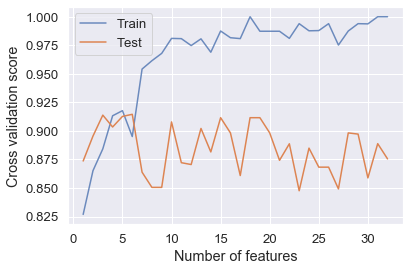

In [ ]:
fig, ax = plt.subplots()
ax.plot(nums, train, alpha=0.8, label='Train')
ax.plot(nums,test, label='Test')
plt.xlabel('Number of features')
# plt.ylim([0,1])
plt.ylabel('Cross validation score')
leg = ax.legend()
plt.show()

In [30]:
print("Total number of features: ",len(trainX.columns.tolist()))
train=[]
test=[]
nums=[]

tot=int(len(trainX.columns.tolist())/3)
print("Number of features tested here: ", 20)
for i in range(1,tot):
    num=i
    nums.append(num)
    print("{:d} most important features".format(num))
    X_important_train, X_important_test, X_important_train_smote, trainY_smote=important_features(trainX, trainY, num)
    train_score,test_score = imbalanced_cross_validation_score(model_RF, X_important_train, trainY, cv, precision_score, SMOTE())
    train.append(train_score)
    test.append(test_score)
    print("Cross-validated training precision score: %.2f, test precision score: %.2f"%(train_score,test_score))


Total number of features:  100
Number of features tested here:  20
1 most important features
Train precision_score: 1.00 Test precision_score: 0.61
Train precision_score: 1.00 Test precision_score: 0.88
Train precision_score: 1.00 Test precision_score: 0.75
Train precision_score: 1.00 Test precision_score: 1.00
Train precision_score: 1.00 Test precision_score: 0.92
Cross-validated training precision score: 1.00, test precision score: 0.83
2 most important features
Train precision_score: 1.00 Test precision_score: 0.65
Train precision_score: 1.00 Test precision_score: 1.00
Train precision_score: 1.00 Test precision_score: 0.90
Train precision_score: 1.00 Test precision_score: 1.00
Train precision_score: 1.00 Test precision_score: 0.94
Cross-validated training precision score: 1.00, test precision score: 0.90
3 most important features
Train precision_score: 1.00 Test precision_score: 0.82
Train precision_score: 1.00 Test precision_score: 1.00
Train precision_score: 1.00 Test precision_sc

Train precision_score: 1.00 Test precision_score: 0.93
Cross-validated training precision score: 1.00, test precision score: 0.83
23 most important features
Train precision_score: 1.00 Test precision_score: 0.65
Train precision_score: 1.00 Test precision_score: 1.00
Train precision_score: 1.00 Test precision_score: 0.91
Train precision_score: 1.00 Test precision_score: 0.91
Train precision_score: 1.00 Test precision_score: 0.93
Cross-validated training precision score: 1.00, test precision score: 0.88
24 most important features
Train precision_score: 1.00 Test precision_score: 0.65
Train precision_score: 1.00 Test precision_score: 1.00
Train precision_score: 1.00 Test precision_score: 0.64
Train precision_score: 1.00 Test precision_score: 0.91
Train precision_score: 1.00 Test precision_score: 0.94
Cross-validated training precision score: 1.00, test precision score: 0.83
25 most important features
Train precision_score: 1.00 Test precision_score: 0.65
Train precision_score: 1.00 Test p

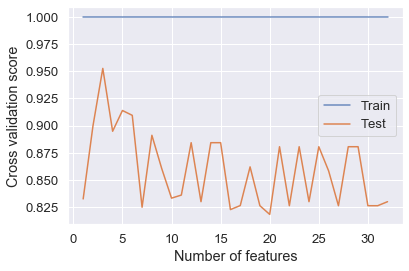

In [31]:
fig, ax = plt.subplots()
ax.plot(nums, train, alpha=0.8, label='Train')
ax.plot(nums,test, label='Test')
plt.xlabel('Number of features')
# plt.ylim([0,1])
plt.ylabel('Cross validation score')
leg = ax.legend()
plt.show()

Logistic Regression
************************************************************
Accuracy on training set: 0.94
Accuracy on test set: 0.77
************************************************************
Confusion matrix:
************************************************************
--------------------
| Confusion Matrix |
--------------------

 [[ 1  5]
 [ 0 16]]


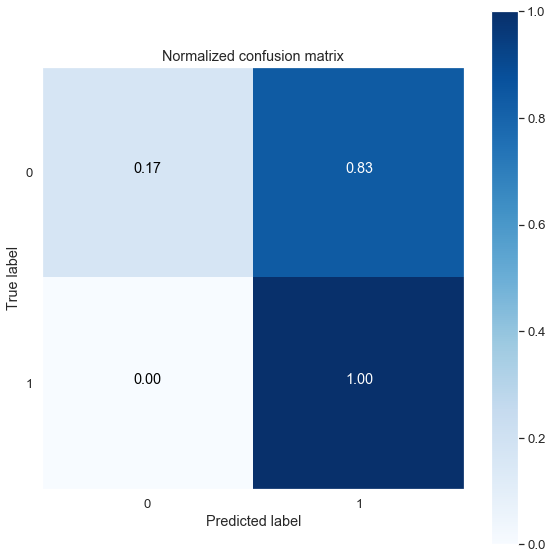

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.76      1.00      0.86        16

   micro avg       0.77      0.77      0.77        22
   macro avg       0.88      0.58      0.58        22
weighted avg       0.83      0.77      0.71        22

************************************************************
ROC curve


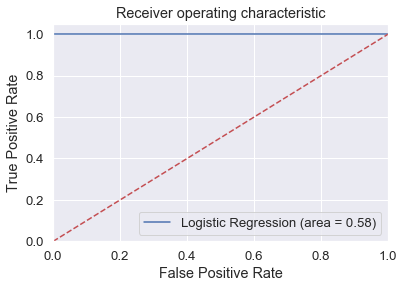

In [32]:
X_important_train, X_important_test, X_important_train_smote, trainY_smote=important_features(trainX, trainY, 10)
get_report(X_important_train,trainY,X_important_test,testY,model_LR,"Logistic Regression")

Logistic Regression
************************************************************
Accuracy on training set: 0.96
Accuracy on test set: 0.95
************************************************************
Confusion matrix:
************************************************************
--------------------
| Confusion Matrix |
--------------------

 [[ 6  0]
 [ 1 15]]


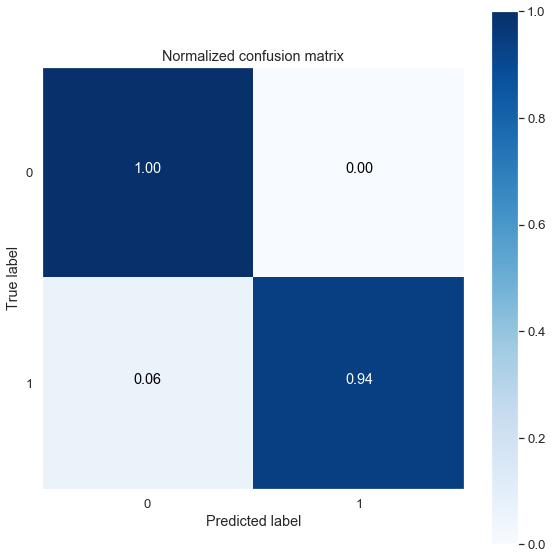

Classification report: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.94      0.97        16

   micro avg       0.95      0.95      0.95        22
   macro avg       0.93      0.97      0.95        22
weighted avg       0.96      0.95      0.96        22

************************************************************
ROC curve


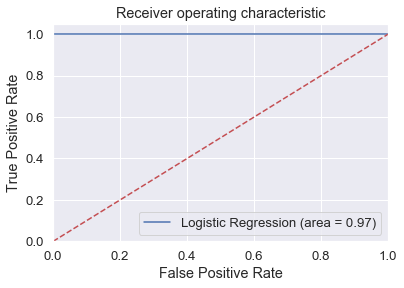

In [33]:
get_report(X_important_train_smote,trainY_smote,X_important_test,testY,model_LR,"Logistic Regression")

Random Forests
************************************************************
Accuracy on training set: 1.00
Accuracy on test set: 0.82
************************************************************
Confusion matrix:
************************************************************
--------------------
| Confusion Matrix |
--------------------

 [[ 2  4]
 [ 0 16]]


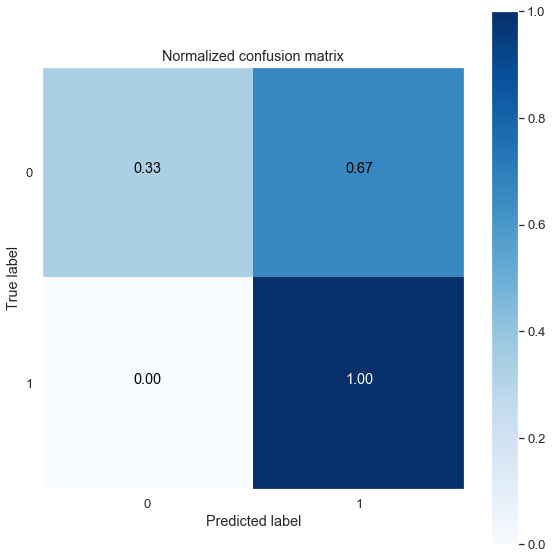

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.80      1.00      0.89        16

   micro avg       0.82      0.82      0.82        22
   macro avg       0.90      0.67      0.69        22
weighted avg       0.85      0.82      0.78        22

************************************************************
ROC curve


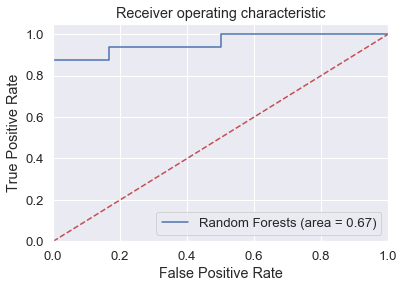

In [34]:
get_report(X_important_train,trainY,X_important_test,testY,model_RF,"Random Forests")

Random Forests
************************************************************
Accuracy on training set: 1.00
Accuracy on test set: 0.91
************************************************************
Confusion matrix:
************************************************************
--------------------
| Confusion Matrix |
--------------------

 [[ 5  1]
 [ 1 15]]


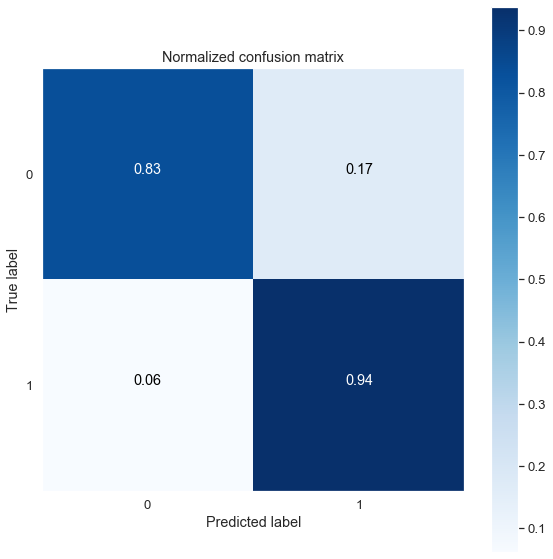

Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.94      0.94      0.94        16

   micro avg       0.91      0.91      0.91        22
   macro avg       0.89      0.89      0.89        22
weighted avg       0.91      0.91      0.91        22

************************************************************
ROC curve


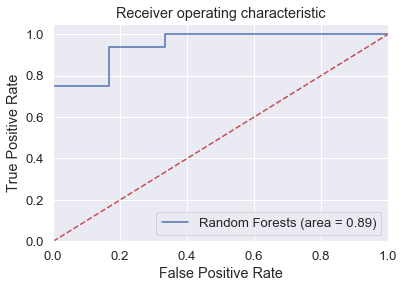

In [35]:
get_report(X_important_train_smote,trainY_smote,X_important_test,testY,model_RF,"Random Forests")

XGBoost
************************************************************
Accuracy on training set: 1.00
Accuracy on test set: 0.82
************************************************************
Confusion matrix:
************************************************************
--------------------
| Confusion Matrix |
--------------------

 [[ 2  4]
 [ 0 16]]


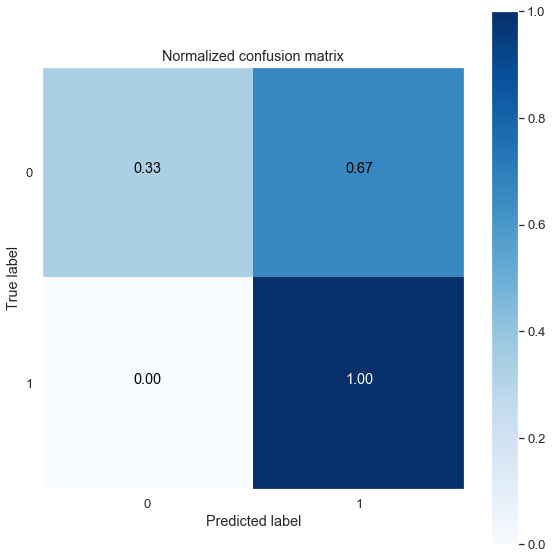

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.80      1.00      0.89        16

   micro avg       0.82      0.82      0.82        22
   macro avg       0.90      0.67      0.69        22
weighted avg       0.85      0.82      0.78        22

************************************************************
ROC curve


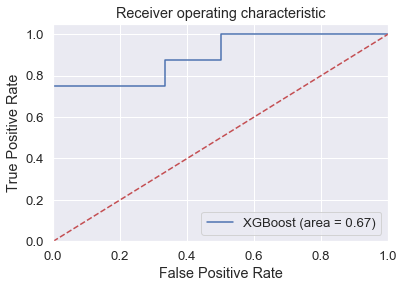

In [36]:
get_report(X_important_train,trainY,X_important_test,testY,model_xgboost,"XGBoost")

XGBoost
************************************************************
Accuracy on training set: 1.00
Accuracy on test set: 0.73
************************************************************
Confusion matrix:
************************************************************
--------------------
| Confusion Matrix |
--------------------

 [[ 3  3]
 [ 3 13]]


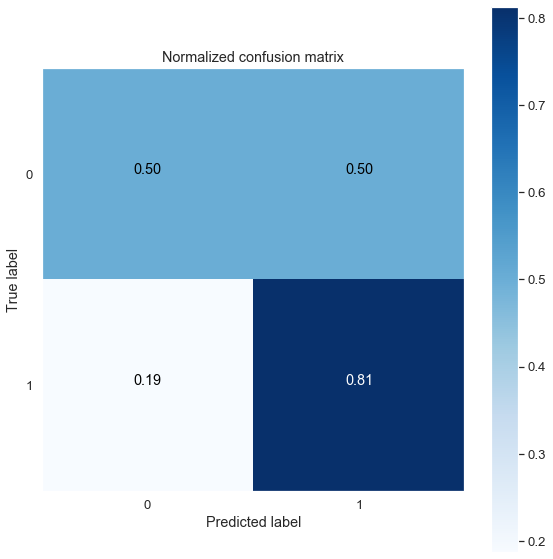

Classification report: 
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.81      0.81      0.81        16

   micro avg       0.73      0.73      0.73        22
   macro avg       0.66      0.66      0.66        22
weighted avg       0.73      0.73      0.73        22

************************************************************
ROC curve


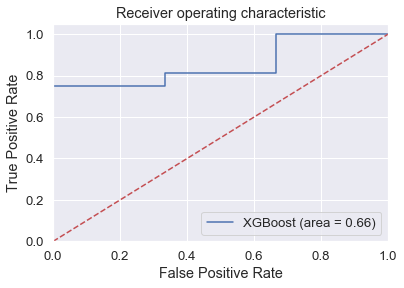

In [37]:

get_report(X_important_train_smote,trainY_smote,X_important_test,testY,model_xgboost,"XGBoost")